In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

These libraries are commonly used for data cleaning, extracting important insights, and data visualization in Python.

In [7]:
from google.colab import files
uploded=files.upload()

Saving cleaned_Cafe_sales_data.csv to cleaned_Cafe_sales_data.csv


Since the file is saved on my computer and not directly available in Google Colab, I need to use the following code to upload and load the dataset.

In [9]:
df=pd.read_csv('cleaned_Cafe_sales_data.csv')

After loading the dataset we have names it as 'df' for better understanding.

In [12]:
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,8.0,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11


It helps to see the first 5 rows of the table.

In [14]:
df.describe()

,Quantity,Price Per Unit,Total Spent
count,10000.000000,10000.00000,10000.00000
mean,3.027100,2.95265,8.87795
std,1.384614,1.24396,5.86059
min,1.000000,1.00000,1.00000
25%,2.000000,2.00000,4.00000
50%,3.000000,3.00000,8.00000
75%,4.000000,4.00000,12.00000
max,5.000000,5.00000,25.00000


It provides a description of the data.

In [16]:
df.isnull().count()

,0
Transaction ID,10000
Item,10000
Quantity,10000
Price Per Unit,10000
Total Spent,10000
Payment Method,10000
Location,10000
Transaction Date,10000


We are checking if the data has any null values or not.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    10000 non-null  object 
 1   Item              10000 non-null  object 
 2   Quantity          10000 non-null  float64
 3   Price Per Unit    10000 non-null  float64
 4   Total Spent       10000 non-null  float64
 5   Payment Method    10000 non-null  object 
 6   Location          10000 non-null  object 
 7   Transaction Date  10000 non-null  object 
dtypes: float64(3), object(5)
memory usage: 625.1+ KB


Check which columns are numeric, categorical, datetime, etc.

In [22]:
df.duplicated().sum()

np.int64(0)

It shows how many dublicate values do we have.

In [26]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])

Changed the data type of Transaction data as date and time.

/tmp/ipython-input-3339594021.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.set_index('Transaction Date').resample('M')['Total Spent'].sum()


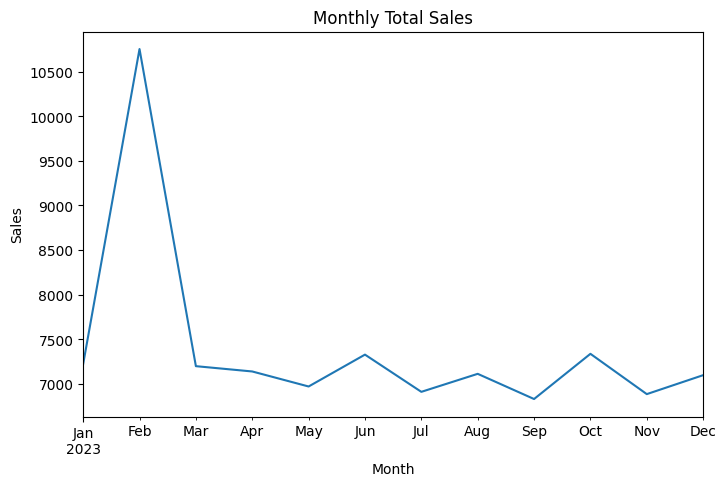

In [31]:
monthly_sales = df.set_index('Transaction Date').resample('M')['Total Spent'].sum()

monthly_sales.plot(kind='line', figsize=(8,5))
plt.title('Monthly Total Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()


This is a line chart showing how total sales change each month over time.

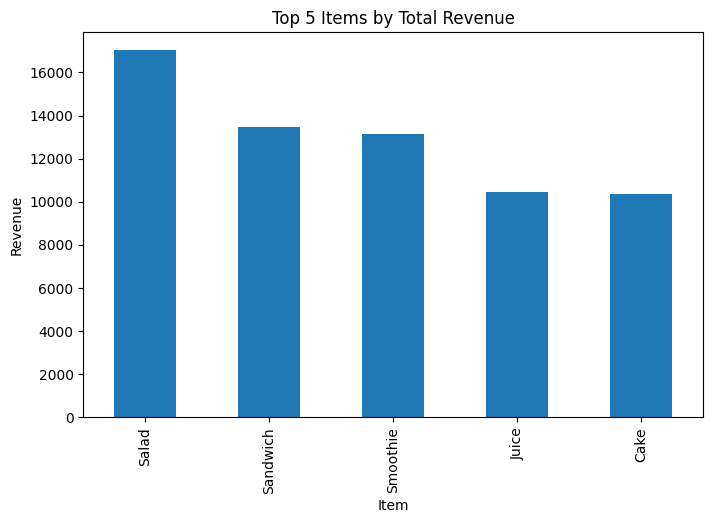

In [38]:
top_items = df.groupby('Item')['Total Spent'].sum().sort_values(ascending=False).head(5)
top_items.plot(kind='bar', figsize=(8,5))
plt.title('Top 5 Items by Total Revenue')
plt.ylabel('Revenue')
plt.show()

This code shows top 5 selling items by total revenue.